# Table of Contents
1. [Introduction](#Introduction)
2. [Data Loading](#Data-Loading)
3. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Feature Engineering](#Feature-Engineering)
6. [Model Building](#Model-Building)
7. [Model Evaluation](#Model-Evaluation)
8. [Conclusion and Future Work](#Conclusion-and-Future-Work)

# Introduction
Car insurance premiums can be a significant expense for drivers, and understanding the factors that influence these premiums can be both enlightening and financially beneficial. In this notebook, we will explore a dataset containing information about drivers and their car insurance premiums. Our goal is to uncover patterns and build a predictive model to estimate insurance premiums based on various factors such as driver age, experience, and car age. If you find this notebook useful, please consider upvoting it.

# Data Loading
Let's start by loading the data and taking a quick look at its structure.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
train_df = pd.read_csv('/kaggle/input/car-insurance-premium-dataset/car_insurance_premium_dataset.csv')
test_df = pd.read_csv('/kaggle/input/car-insurance-premium-dataset/car_insurance_premium_dataset_TEST.csv')

# Display the first few rows of the training dataset
train_df.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55


# Data Cleaning and Preprocessing
Before diving into analysis, it's crucial to ensure our data is clean and well-prepared. Let's check for missing values, data types, and any anomalies.

In [2]:
# Check for missing values
train_df.isnull().sum()

Driver Age                   0
Driver Experience            0
Previous Accidents           0
Annual Mileage (x1000 km)    0
Car Manufacturing Year       0
Car Age                      0
Insurance Premium ($)        0
dtype: int64

In [3]:
# Check data types
train_df.dtypes

Driver Age                     int64
Driver Experience              int64
Previous Accidents             int64
Annual Mileage (x1000 km)      int64
Car Manufacturing Year         int64
Car Age                        int64
Insurance Premium ($)        float64
dtype: object

The dataset appears to be clean with no missing values, and the data types are as expected. Let's proceed to exploratory data analysis.

# Exploratory Data Analysis
In this section, we will visualize the data to understand the relationships between different variables and the insurance premium.

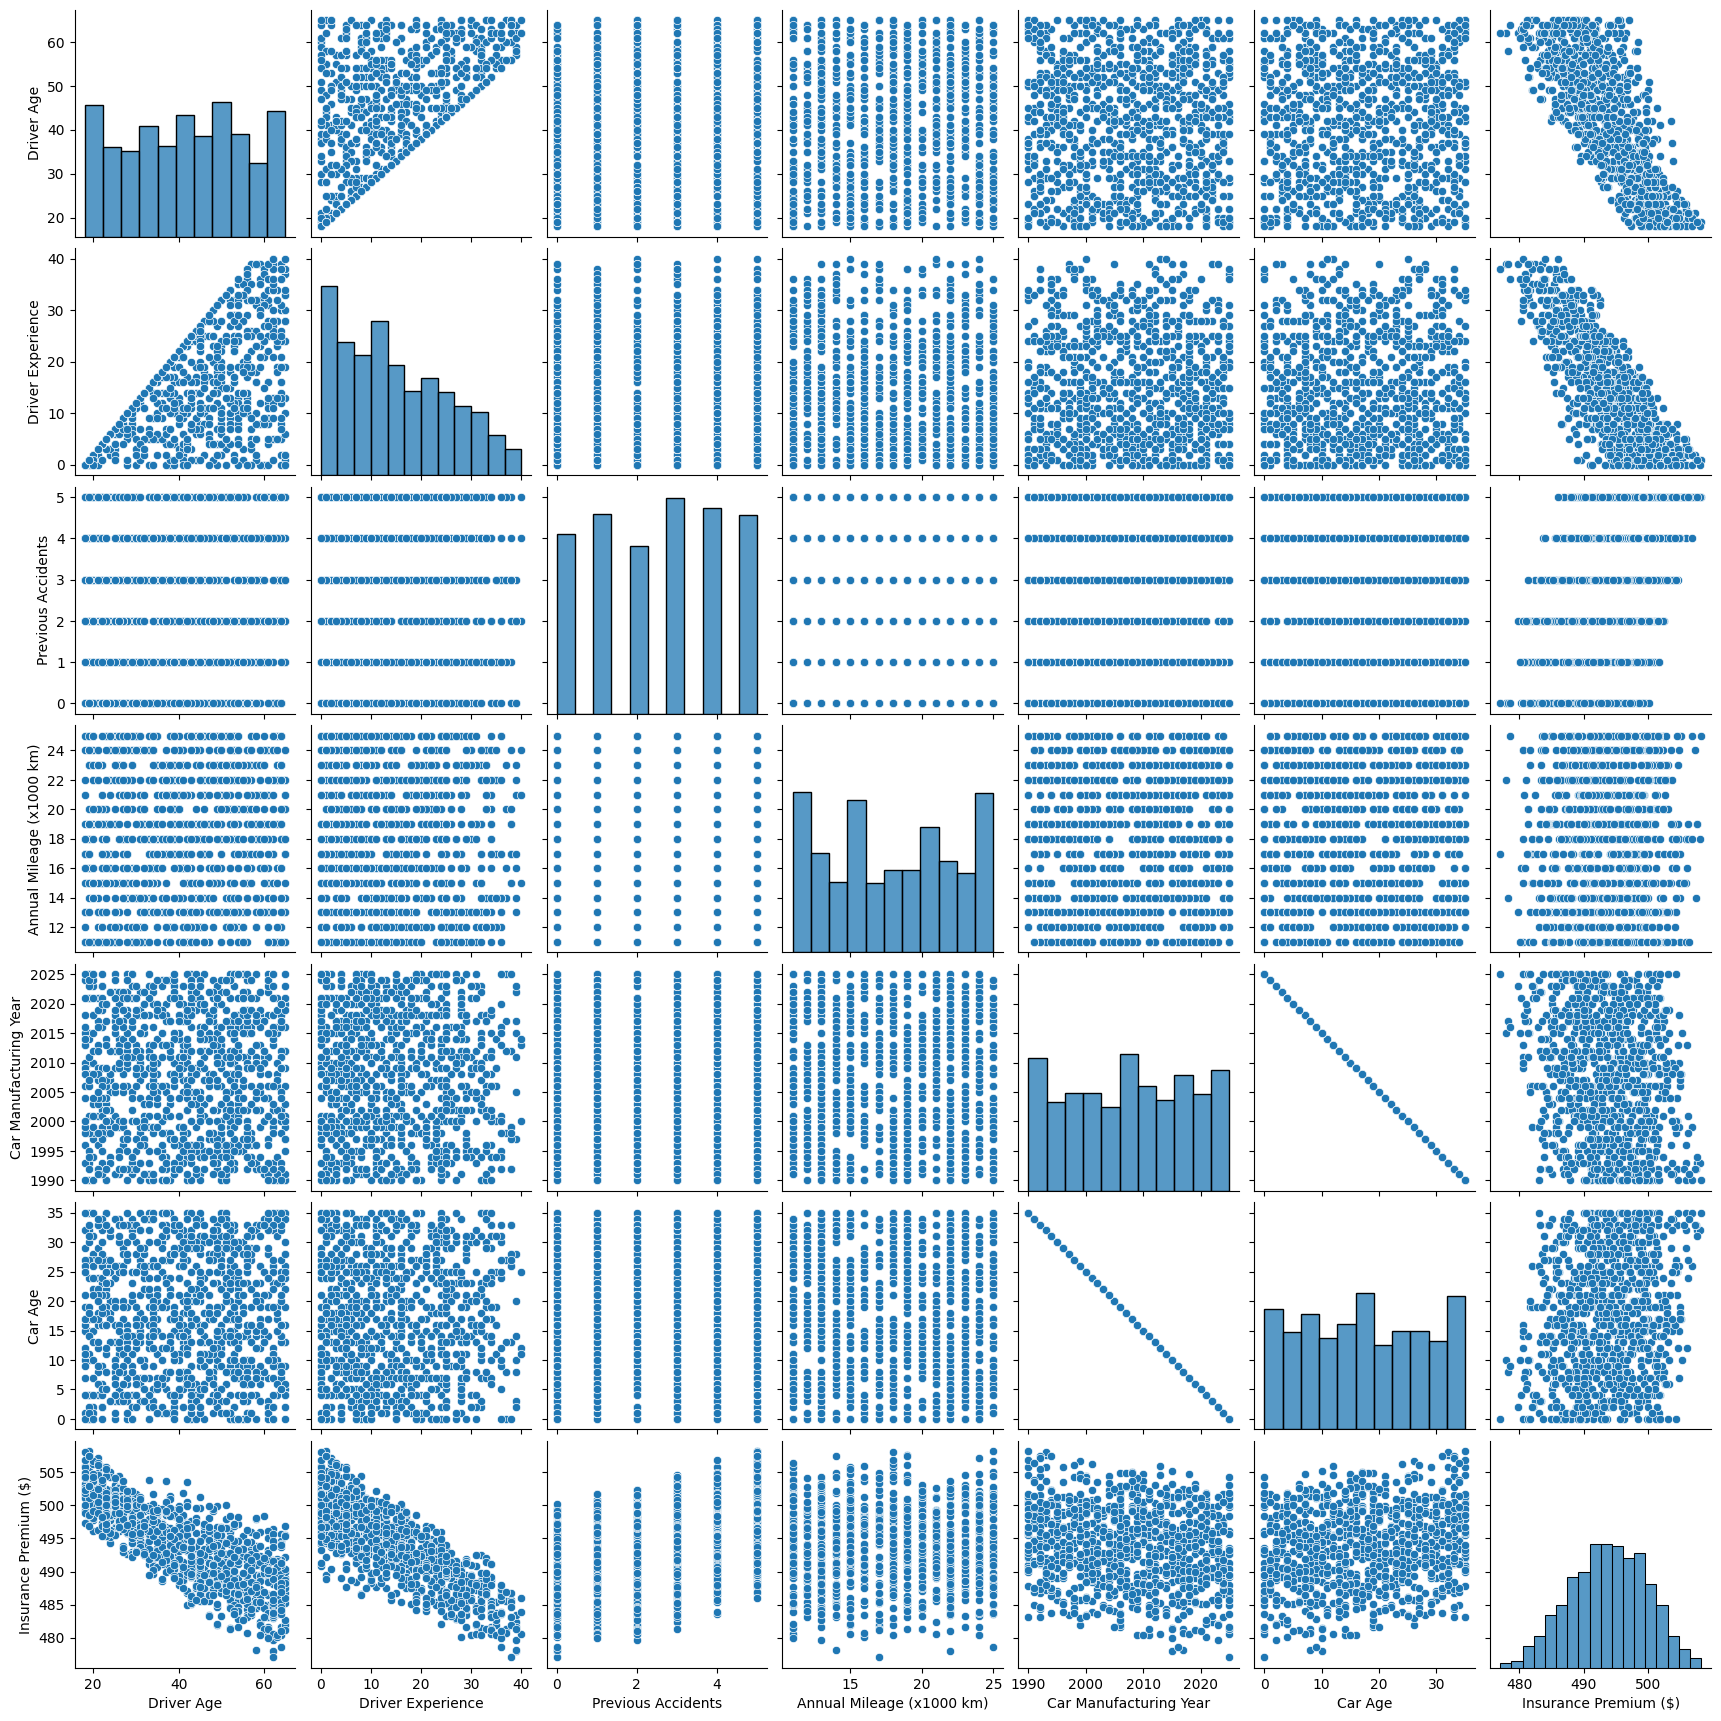

In [4]:
# Pair plot to visualize relationships
sns.pairplot(train_df)
plt.show()

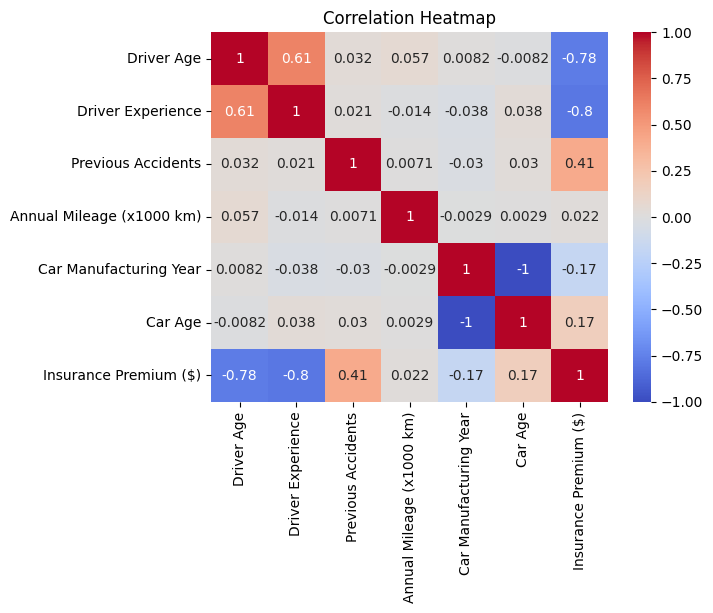

In [5]:
# Correlation heatmap
numeric_df = train_df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The pair plot and correlation heatmap provide insights into the relationships between variables. Notably, the insurance premium seems to have a strong correlation with driver age and car age.

# Feature Engineering
Based on our exploratory analysis, we might consider creating new features or transforming existing ones to improve our model's performance.

In [6]:
# Example of feature engineering: creating a new feature for driver risk
train_df['Driver Risk'] = train_df['Previous Accidents'] / (train_df['Driver Experience'] + 1)
test_df['Driver Risk'] = test_df['Previous Accidents'] / (test_df['Driver Experience'] + 1)

# Display the first few rows to verify the new feature
train_df.head()

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($),Driver Risk
0,56,32,4,17,2002,23,488.35,0.121212
1,46,19,0,21,2025,0,486.15,0.000000
2,32,11,4,15,2020,5,497.55,0.333333
3,60,0,4,19,1991,34,498.35,4.000000
4,25,7,0,13,2005,20,495.55,0.000000


# Model Building
With our data prepared, we can now build a predictive model. We'll use a simple linear regression model to predict the insurance premium.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = train_df.drop('Insurance Premium ($)', axis=1)
y = train_df['Insurance Premium ($)']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation
Let's evaluate the performance of our model using the validation set.

In [8]:
# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

mse, r2

(9.693522803355793e-27, 1.0)

The model's performance is quantified by the Mean Squared Error (MSE) and R-squared (R2) score. These metrics will help us understand how well our model is predicting the insurance premiums.

# Conclusion and Future Work
In this notebook, we explored a dataset on car insurance premiums, performed data cleaning, conducted exploratory data analysis, engineered features, and built a predictive model. While our linear regression model provides a baseline, there is room for improvement. Future work could involve trying more complex models, such as decision trees or ensemble methods, and performing hyperparameter tuning to enhance prediction accuracy. Additionally, incorporating external data sources, such as geographical information or economic indicators, could further refine our predictions.